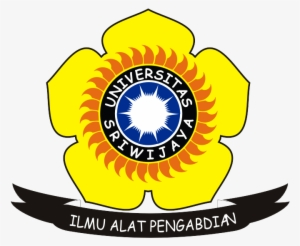

<h1>SYERPRI WINDRIYA KUSUMAWATI (09011281823035)</h1>

<p>Pengujian Artificial Neural Network Back Propagation pada data Kanker Payudara</p>

<h1>1. Perkenalan</h1>

<p>Jaringan Neural Propagasi Balik adalah jaringan umpan maju dengan arsitektur yang cukup sederhana. Arsitektur jaringan terdiri dari lapisan masukan, satu atau lebih lapisan tersembunyi dan lapisan keluaran. Jenis jaringan ini dapat membedakan data yang tidak dapat dipisahkan secara linier. Kami menggunakan algoritme propagasi mundur kesalahan untuk menyesuaikan iteratif jaringan.</p>

<h1>2. Teori kesalahan algoritma propagasi balik</h1>
<p>Algoritme propagasi balik kesalahan terdiri dari dua langkah besar:
<br>
a) Meneruskan masukan dari database ke lapisan masukan daripada ke lapisan tersembunyi dan terakhir ke lapisan keluaran. <br>
b) Menghitung kesalahan keluaran dan memasukkannya ke belakang untuk menyetel variabel jaringan.</p>

<h1>3. Deskripsi database</h1>
<p>Dalam contoh ini kita akan menggunakan database Duke Breast Cancer yang terdiri dari [86] entri dan [7129] atribut ditambah atribut kelas yang terletak di kolom pertama. Datanya berupa numerik dan tidak memiliki nilai yang hilang.</p>

<h1>4. Implementasi Neural Network propagasi balik</h1>
<p>Pertama-tama, kita perlu memuat database.</p>

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

db = np.loadtxt("duke-breast-cancer.txt")
print("Database raw shape (%s,%s)" % np.shape(db))

Database raw shape (86,7130)


In [6]:
np.random.shuffle(db)
y = db[:, 0]
x = np.delete(db, [0], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
print(np.shape(x_train),np.shape(x_test))

(77, 7129) (9, 7129)


<p>Sekarang kita harus membuat vektor lapisan tersembunyi, matriks bobot, vektor lapisan keluaran, dan matriks bobot tersembunyi. Kami memilih lapisan tersembunyi yang akan dibuat dari sejumlah [72] perceptron tersembunyi. Output layer harus memiliki jumlah perceptrons yang sama dengan jumlah kelas. Matriks bobot akan memiliki bentuk berikut: baris = jumlah atribut database, cols = jumlah persepsi lapisan tersembunyi dan matriks bobot tersembunyi akan memiliki yang berikut bentuk: garis = panjang lapisan tersembunyi, kolom = jumlah perceptrons lapisan keluaran.</p>

In [7]:
hidden_layer = np.zeros(72)
weights = np.random.random((len(x[0]), 72))
output_layer = np.zeros(2)
hidden_weights = np.random.random((72, 2))

<p>Untuk melanjutkan kita perlu menerapkan:
<br><br>
Fungsi penjumlahan<br>
Fungsi aktivasi<br>
Fungsi SoftMax<br>
Fungsi Hitung Ulang Bobot<br>
Fungsi propagasi balik<br>
Fungsi penjumlahan<br>
s_i adalah jumlah dari [i] perceptron dari layer.</p>

<h3>Fungsi penjumlahan</h3>
<p>s_i adalah jumlah dari [i] perceptron dari layer.</p>

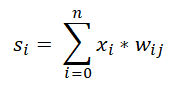

In [8]:
def sum_function(weights, index_locked_col, x):
    result = 0
    for i in range(0, len(x)):
        result += x[i] * weights[i][index_locked_col]
    return result

<h3>Fungsi aktivasi</h3>
<p>g(s_i) adalah aktivasi untuk [i] perceptron dari layer.</p>

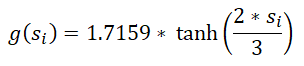

In [9]:
def activate_layer(layer, weights, x):
    for i in range(0, len(layer)):
        layer[i] = 1.7159 * np.tanh(2.0 * sum_function(weights, i, x) / 3.0)

<h3>Fungsi SoftMax</h3>
<p>Fungsi softmax, atau fungsi eksponensial yang dinormalisasi, adalah generalisasi dari fungsi logistik yang "memadatkan" vektor berdimensi K z dari nilai riil sembarang ke vektor berdimensi K σ (z) dari nilai riil dalam rentang (0, 1 ) yang berjumlah 1.</p>

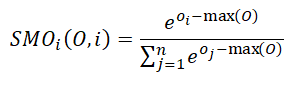

In [10]:
def soft_max(layer):
    soft_max_output_layer = np.zeros(len(layer))
    for i in range(0, len(layer)):
        denominator = 0
        for j in range(0, len(layer)):
            denominator += np.exp(layer[j] - np.max(layer))
        soft_max_output_layer[i] = np.exp(layer[i] - np.max(layer)) / denominator
    return soft_max_output_layer

<h3>Hitung ulang fungsi bobot</h3>
<p>Di sini kami menyesuaikan bobot jaringan dan matriks bobot tersembunyi. Kami akan menggunakan ini di dalam fungsi propagasi belakang.</p>

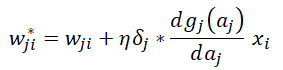

In [12]:
def recalculate_weights(learning_rate, weights, gradient, activation):
    for i in range(0, len(weights)):
        for j in range(0, len(weights[i])):
            weights[i][j] = (learning_rate * gradient[j] * activation[i]) + weights[i][j]

<h3>Fungsi propagasi balik</h3>
<p>Dalam fungsi ini kita mengetahui gradien lapisan keluaran dan gradien lapisan tersembunyi untuk menghitung ulang bobot jaringan. Rumus gradien keluaran</p>

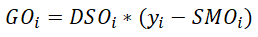

<p>Rumus gradien tersembunyi</p>

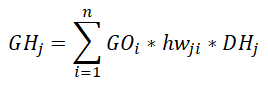

In [13]:
def back_propagation(hidden_layer, output_layer, one_hot_encoding, learning_rate, x):
    output_derivative = np.zeros(2)
    output_gradient = np.zeros(2)
    for i in range(0, len(output_layer)):
        output_derivative[i] = (1.0 - output_layer[i]) * output_layer[i]
    for i in range(0, len(output_layer)):
        output_gradient[i] = output_derivative[i] * (one_hot_encoding[i] - output_layer[i])
    hidden_derivative = np.zeros(72)
    hidden_gradient = np.zeros(72)
    for i in range(0, len(hidden_layer)):
        hidden_derivative[i] = (1.0 - hidden_layer[i]) * (1.0 + hidden_layer[i])
    for i in range(0, len(hidden_layer)):
        sum_ = 0
        for j in range(0, len(output_gradient)):
            sum_ += output_gradient[j] * hidden_weights[i][j]
        hidden_gradient[i] = sum_ * hidden_derivative[i]
    recalculate_weights(learning_rate, hidden_weights, output_gradient, hidden_layer)
    recalculate_weights(learning_rate, weights, hidden_gradient, x)

<p>Selanjutnya kita dapat satu hot encode output kita dan mulai melatih iteratif jaringan kita.</p>

In [14]:
one_hot_encoding = np.zeros((2,2))
for i in range(0, len(one_hot_encoding)):
    one_hot_encoding[i][i] = 1
training_correct_answers = 0
for i in range(0, len(x_train)):
    activate_layer(hidden_layer, weights, x_train[i])
    activate_layer(output_layer, hidden_weights, hidden_layer)
    output_layer = soft_max(output_layer)
    training_correct_answers += 1 if y_train[i] == np.argmax(output_layer) else 0
    back_propagation(hidden_layer, output_layer, one_hot_encoding[int(y_train[i])], -1, x_train[i])
print("MLP Correct answers while learning: %s / %s (Accuracy = %s) on %s database." % (training_correct_answers, len(x_train), 
                                                                                       training_correct_answers/len(x_train),"Duke breast cancer"))

MLP Correct answers while learning: 48 / 77 (Accuracy = 0.6233766233766234) on Duke breast cancer database.


<p>Keakuratan tes bergantung pada matriks bobot acak yang dihasilkan dan kecepatan pembelajaran. Menggunakan kecepatan pembelajaran dan bobot yang berbeda akan menghasilkan akurasi yang berbeda.</p>

In [15]:
testing_correct_answers = 0
for i in range(0, len(x_test)):
    activate_layer(hidden_layer, weights, x_test[i])
    activate_layer(output_layer, hidden_weights, hidden_layer)
    output_layer = soft_max(output_layer)
    testing_correct_answers += 1 if y_test[i] == np.argmax(output_layer) else 0
print("MLP Correct answers while testing: %s / %s (Accuracy = %s) on %s database" % (testing_correct_answers, len(x_test),
                                                                                     testing_correct_answers/len(x_test), "Duke breast cancer"))

MLP Correct answers while testing: 9 / 9 (Accuracy = 1.0) on Duke breast cancer database


<p>Pada set pengujian ini, akurasi dapat mencapai 100% dengan jumlah perceptron tersembunyi yang tepat di lapisan tersembunyi. Dalam contoh ini, kami menggunakan kecepatan pembelajaran [-1] dengan total [72] perceptron tersembunyi di lapisan tersembunyi.</p>

<h3>5. Kesimpulan</h3>
<p>Dalam pengujian ini kami telah menunjukkan bahwa jaringan saraf tiruan propagasi balik bekerja dengan baik pada kumpulan data yang besar. Performa dapat ditingkatkan dengan mengubah jumlah neuron tersembunyi dan kecepatan pembelajaran. Karena pelatihan iteratif dan pelatihan berbasis gradien, kecepatan umum jauh lebih lambat daripada yang dibutuhkan, sehingga membutuhkan banyak waktu untuk berlatih pada kumpulan data yang sangat besar. Kami tidak dapat mengatakan bahwa ada jaringan yang sempurna untuk setiap jenis database di luar sana. Jadi, teruslah menguji data Anda di beberapa jaringan neural dan lihat mana yang paling cocok.
<br><br>
Saya harap buku catatan ini membantu Anda memulai perjalanan Anda ke dalam pembelajaran mesin dan dunia data besar.</p>

Sumber : https://www.kaggle.com/andreicosma/back-propagation-neural-network